<a href="https://colab.research.google.com/github/yecatstevir/teambrainiac/blob/main/source/Group_charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MASK YOUNG ADULT and ADOLESCENT

In [4]:
from google.colab import drive, files
drive.mount('/content/gdrive')#, force_remount = True)

# Clone the entire repo.
!git clone -l -s https://github.com/yecatstevir/teambrainiac.git
# Change directory into cloned repo
%cd teambrainiac/source
!ls


uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Cloning into 'teambrainiac'...
remote: Enumerating objects: 1059, done.
remote: Counting objects: 100% (1059/1059), done.
remote: Compressing objects: 100% (813/813), done.
remote: Total 1059 (delta 666), reused 463 (delta 230), pack-reused 0
Receiving objects: 100% (1059/1059), 82.74 MiB | 29.62 MiB/s, done.
Resolving deltas: 100% (666/666), done.
/content/teambrainiac/source/teambrainiac/source
access_data.py			  models
AccuracyMeasures.ipynb		  process.py
analysis.py			  SingleSubjectSVM.ipynb
cross_validation.py		  SubjectVisualization_Models_ZNORM.ipynb
data				  SVM_Group_Adolescent_Whole_brain.ipynb
DataExploration_SingleSubj.ipynb  SVM_Group_YA_Whole_brain.ipynb
DataExplorationVisuals.ipynb	  TestMask.ipynb
DL				  Timeseries_Cross_Validation.ipynb
Explore_data.ipynb		  train.py
Group_All_MASK_SVM.ipynb	  utils.py
Group_charts.ipynb		  Visualization

Saving path_config.py to path_config.py
User uploaded file "path_config.py" with length 228 bytes


In [6]:
# Import libraries
!pip install boto3 nilearn
import pickle
from process import *
from access_data import *

from sklearn.svm import SVC
import numpy as np
from collections import defaultdict
import nibabel as nib
from nilearn import plotting
import matplotlib.pyplot as plt
import pandas as pd

ImportError: ignored

## Load models

In [ ]:


mask_type = 'mask' #'mask', 'masksubACC', 'masksubAI', 'masksubNAcc', 'masksubmPFC'// 'acc_aal', 'anterior_insula_aal', 'mPFC', 'nacc_aal', 

def model_metric_data(mask_type):

  # Define directories where metrics and models are stored on AWS
  metric_directory = f"metrics/group_svm/{mask_type}/"
  model_directory = "models/group/"

  # Assign path names to variables for Adolescent and Young Adult
  ad_metric_file = f"AD_AD_[2, 3]_{mask_type}_metrics.pkl"
  ad_model_file = f"AD_AD_[2, 3]_{mask_type}_X_y_model.pkl"
  ya_metric_file = f"YA_YA_[2, 3]_{mask_type}_metrics.pkl"
  ya_model_file = f"YA_YA_[2, 3]_{mask_type}_X_y_model.pkl"

  # Grab Adolescent and Young Adult metric and model dictionaries 
  adad_metric = access_load_data(f'{metric_directory}{ad_metric_file}', False)
  adad_model = access_load_data(f'{model_directory}{ad_model_file}', False)
  yaya_metric = access_load_data(f'{metric_directory}{ya_metric_file}', False)
  yaya_model = access_load_data(f'{model_directory}{ya_model_file}', False)

  # Define empty dictionary
  df_dict = defaultdict(list)

  # Load the data and save as a DF 
  mask_data_list = ((mask_type, adad_model, adad_metric, "Adolescent"), (mask_type, yaya_model, yaya_metric,"Young Adult"))

  for msk, mdl, mtric, grp in mask_data_list:
    df_dict['mask_type'].append(msk)
    df_dict['group'].append(grp)
    df_dict['model'].append(mdl['model'][0])
    df_dict['X'].append(mdl['X_train'][0])
    df_dict['y'].append(mdl['y_train'][0])
    df_dict['y_v'].append(mtric['y_v'][0])
    df_dict['y_t'].append(mtric['y_t'][0])
    df_dict['val_preds'].append(mtric['val_preds'][0])
    df_dict['test_preds'].append(mtric['test_preds'][0])
    df_dict['val_probs'].append(mtric['val_probs'][0])
    df_dict['test_probs'].append(mtric['test_probs'][0])


  df = pd.DataFrame(df_dict)
  df.to_csv(f'/content/gdrive/MyDrive/YA_AD_{msk}_df2.csv', index = False, header = True)

  return True

for data in ['mask' 'masksubACC']:#, 'masksubAI', 'masksubNAcc', 'masksubmPFC']:
  model_metric_data(data)


### Load Mask whole brain

In [41]:
mask_type = 'mask' #'mask', 'masksubACC', 'masksubAI', 'masksubNAcc', 'masksubmPFC'// 'acc_aal', 'anterior_insula_aal', 'mPFC', 'nacc_aal', 
metric_directory = f"metrics/group_svm/{mask_type}/"
metric_file = f"AD_AD_[2, 3]_{mask_type}_metrics.pkl"
model_directory = "models/group/"
model_file = f"AD_AD_[2, 3]_{mask_type}_X_y_model.pkl"

adad_mask = access_load_data(f'{metric_directory}{metric_file}', False)
adad_model = access_load_data(f'{model_directory}{model_file}', False)

In [ ]:
mask_type = 'mask' #'mask', 'masksubACC', 'masksubAI', 'masksubNAcc', 'masksubmPFC'// 'acc_aal', 'anterior_insula_aal', 'mPFC', 'nacc_aal', 
metric_directory = "metrics/group_svm/whole/"
metric_file = f"YA_YA_[2, 3]_{mask_type}_metrics.pkl"
model_directory = "models/group/"
model_file = f"YA_YA_[2, 3]_{mask_type}_X_y_model.pkl"

yaya_mask = access_load_data(f'{metric_directory}{metric_file}', False)
yaya_model = access_load_data(f'{model_directory}{model_file}', False)


### Load subACC

In [70]:
mask_type = 'masksubACC' #'mask', 'masksubACC', 'masksubAI', 'masksubNAcc', 'masksubmPFC'// 'acc_aal', 'anterior_insula_aal', 'mPFC', 'nacc_aal', 
metric_directory = f"metrics/group_svm/{mask_type}/"
metric_file = f"AD_AD_[2, 3]_{mask_type}_metrics.pkl"
model_directory = "models/group/"
model_file = f"AD_AD_[2, 3]_{mask_type}_X_y_model.pkl"

adad_subacc = access_load_data(f'{metric_directory}{metric_file}', False)
adad_model_subacc = access_load_data(f'{model_directory}{model_file}', False)

In [73]:
mask_type = 'masksubACC' #'mask', 'masksubACC', 'masksubAI', 'masksubNAcc', 'masksubmPFC'// 'acc_aal', 'anterior_insula_aal', 'mPFC', 'nacc_aal', 
metric_directory = f"metrics/group_svm/{mask_type}/"
metric_file = f"YA_YA_[2, 3]_{mask_type}_metrics.pkl"
model_directory = "models/group/"
model_file = f"YA_YA_[2, 3]_{mask_type}_X_y_model.pkl"

yaya_subacc = access_load_data(f'{metric_directory}{metric_file}', False)
yaya_model_subacc = access_load_data(f'{model_directory}{model_file}', False)

### Load subAI



In [3]:
mask_type = 'masksubAI' #'mask', 'masksubACC', 'masksubAI', 'masksubNAcc', 'masksubmPFC'// 'acc_aal', 'anterior_insula_aal', 'mPFC', 'nacc_aal', 
metric_directory = f"metrics/group_svm/{mask_type}/"
metric_file = f"AD_AD_[2, 3]_{mask_type}_metrics.pkl"
model_directory = "models/group/"
model_file = f"AD_AD_[2, 3]_{mask_type}_X_y_model.pkl"

adad_subai = access_load_data(f'{metric_directory}{metric_file}', False)
adad_model_subai = access_load_data(f'{model_directory}{model_file}', False)

In [4]:
mask_type = 'masksubAI' #'mask', 'masksubACC', 'masksubAI', 'masksubNAcc', 'masksubmPFC'// 'acc_aal', 'anterior_insula_aal', 'mPFC', 'nacc_aal', 
metric_directory = f"metrics/group_svm/{mask_type}/"
metric_file = f"YA_YA_[2, 3]_{mask_type}_metrics.pkl"
model_directory = "models/group/"
model_file = f"YA_YA_[2, 3]_{mask_type}_X_y_model.pkl"

yaya_subai = access_load_data(f'{metric_directory}{metric_file}', False)
yaya_model_subai = access_load_data(f'{model_directory}{model_file}', False)

### Load subNAcc

In [5]:
mask_type = 'masksubNAcc' #'mask', 'masksubACC', 'masksubAI', 'masksubNAcc', 'masksubmPFC'// 'acc_aal', 'anterior_insula_aal', 'mPFC', 'nacc_aal', 
metric_directory = f"metrics/group_svm/{mask_type}/"
metric_file = f"AD_AD_[2, 3]_{mask_type}_metrics.pkl"
model_directory = "models/group/"
model_file = f"AD_AD_[2, 3]_{mask_type}_X_y_model.pkl"

adad_subnacc = access_load_data(f'{metric_directory}{metric_file}', False)
adad_model_subnacc = access_load_data(f'{model_directory}{model_file}', False)

In [6]:
mask_type = 'masksubNAcc' #'mask', 'masksubACC', 'masksubAI', 'masksubNAcc', 'masksubmPFC'// 'acc_aal', 'anterior_insula_aal', 'mPFC', 'nacc_aal', 
metric_directory = f"metrics/group_svm/{mask_type}/"
metric_file = f"YA_YA_[2, 3]_{mask_type}_metrics.pkl"
model_directory = "models/group/"
model_file = f"YA_YA_[2, 3]_{mask_type}_X_y_model.pkl"

yaya_subnacc = access_load_data(f'{metric_directory}{metric_file}', False)
yaya_model_subnacc = access_load_data(f'{model_directory}{model_file}', False)

### Load submPFC

In [6]:
mask_type = 'masksubmPFC' #'mask', 'masksubACC', 'masksubAI', 'masksubNAcc', 'masksubmPFC'// 'acc_aal', 'anterior_insula_aal', 'mPFC', 'nacc_aal', 
metric_directory = f"metrics/group_svm/{mask_type}/"
metric_file = f"AD_AD_[2, 3]_{mask_type}_metrics.pkl"
model_directory = "models/group/"
model_file = f"AD_AD_[2, 3]_{mask_type}_X_y_model.pkl"

adad_submpfc = access_load_data(f'{metric_directory}{metric_file}', False)
adad_model_submpfc = access_load_data(f'{model_directory}{model_file}', False)

In [7]:
mask_type = 'masksubmPFC' #'mask', 'masksubACC', 'masksubAI', 'masksubNAcc', 'masksubmPFC'// 'acc_aal', 'anterior_insula_aal', 'mPFC', 'nacc_aal', 
metric_directory = f"metrics/group_svm/{mask_type}/"
metric_file = f"YA_YA_[2, 3]_{mask_type}_metrics.pkl"
model_directory = "models/group/"
model_file = f"YA_YA_[2, 3]_{mask_type}_X_y_model.pkl"

yaya_submpfc = access_load_data(f'{metric_directory}{metric_file}', False)
yaya_model_submpfc = access_load_data(f'{model_directory}{model_file}', False)

In [ ]:
# Load the data
clf = yaya_model['model'][0]
X = yaya_model['X_train'][0]
y = yaya_model['y_train'][0]
y_v = yaya_mask['y_v'][0]
y_t = yaya_mask['y_t'][0]
y_vpred = yaya_mask['val_preds'][0]
y_tpred = yaya_mask['test_preds'][0]
y_vprob = yaya_mask['val_probs'][0]
y_tprob = yaya_mask['test_probs'][0]


# Load the data
clfad = adad_model['model'][0]
Xad = adad_model['X_train'][0]
yad = adad_model['y_train'][0]
y_vad = adad_mask['y_v'][0]
y_tad = adad_mask['y_t'][0]
y_vpredad = adad_mask['val_preds'][0]
y_tpredad = adad_mask['test_preds'][0]
y_vprobad = adad_mask['val_probs'][0]
y_tprobad = adad_mask['test_probs'][0]


### Put everything in a dictionary and save

In [8]:
from collections import defaultdict
import pandas as pd

df_dict = defaultdict(list)

# Load the data
#whole_brain = (('mask', adad_model,adad_mask, "Adolescent"), ("mask", yaya_model, yaya_mask,"Young Adult"))
#subacc = (('subACC', adad_model_subacc, adad_subacc, "Adolescent"), ("subACC", yaya_model_subacc, yaya_subacc, "Young Adult"))
#subai = (('subAI', adad_model_subai, adad_subai, "Adolescent"), ("subAI", yaya_model_subai, yaya_subai,"Young Adult"))
#subnacc = (('subNAcc', adad_model_subnacc, adad_subnacc, "Adolescent"), ('subNAcc', yaya_model_subnacc, yaya_subnacc, "Young Adult"))
submpfc = (('submPFC',adad_model_submpfc, adad_submpfc, "Adolescent"), ("submPFC", yaya_model_submpfc, yaya_submpfc, "Young Adult"))


for mask_data_list in [submpfc]:#,subacc]:#,subai,subnacc, submpfc]:
  for msk, mdl, mtric, grp in mask_data_list:
    df_dict['mask_type'].append(msk)
    df_dict['group'].append(grp)
    df_dict['model'].append(mdl['model'][0])
    df_dict['X'].append(mdl['X_train'][0])
    df_dict['y'].append(mdl['y_train'][0])
    df_dict['y_v'].append(mtric['y_v'][0])
    df_dict['y_t'].append(mtric['y_t'][0])
    df_dict['val_preds'].append(mtric['val_preds'][0])
    df_dict['test_preds'].append(mtric['test_preds'][0])
    df_dict['val_probs'].append(mtric['val_probs'][0])
    df_dict['test_probs'].append(mtric['test_probs'][0])


  df = pd.DataFrame(df_dict)
  df.to_csv(f'/content/gdrive/MyDrive/YA_AD_{msk}_df.csv', index = False, header=True)



In [4]:
mesk = ['mask', 'subACC', 'subNAcc', 'submPFC']
print(mesk)
for m in mesk:
  print(m)
  path = f"/content/gdrive/MyDrive/YA_AD_{m}_df.csv"

  if m == 'mask':
    df1 = pd.read_csv(path)
  else:
    df2 = pd.read_csv(path)
    df1 = pd.concat([df1, df2])

df1.to_csv(f'/content/gdrive/MyDrive/YA_AD_eachmask_df.csv', index = False, header=True)

['mask', 'subACC', 'subNAcc', 'submPFC']
mask
subACC
subNAcc
submPFC


## Confusion Matrix

- may want to add 4 subplot 2x2

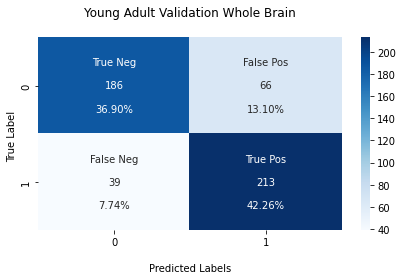

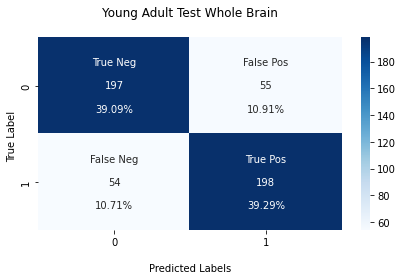

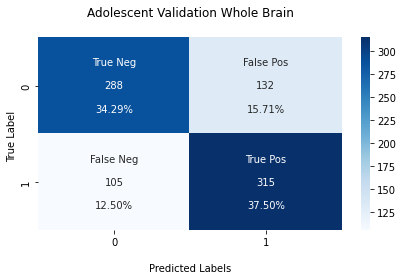

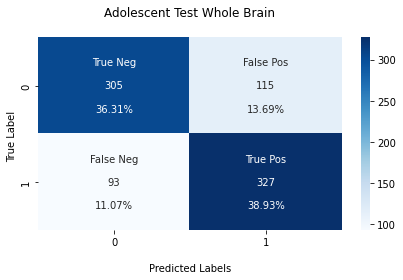

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm_v = confusion_matrix(y_v, y_vpred)
cm_t = confusion_matrix(y_t, y_tpred)

cm_vad = confusion_matrix(y_vad, y_vpredad)
cm_tad = confusion_matrix(y_tad, y_tpredad)

cm_mat = [(cm_v,'Validation', "Young Adult"), 
          (cm_t, 'Test', "Young Adult"), 
          (cm_vad,'Validation', "Adolescent"), 
          (cm_tad, 'Test', "Adolescent")]

if mask_type == "mask":
  mask_type = "Whole Brain"

for cm, name, group_type in cm_mat:
  rate_names = ['True Neg','False Pos','False Neg','True Pos']

  rate_values = ["{0:0}".format(value) for value in cm.flatten()]

  percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

  labels = [f"{val1}\n\n{val2}\n\n{val3}" for val1, val2, val3 in
            zip(rate_names,rate_values,percentages)]

  labels = np.asarray(labels).reshape(2,2)

  ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

  #plt.figure(figsize=(8,8))
  ax.set_title(f'{group_type} {name} {mask_type}\n');
  ax.set_xlabel('\nPredicted Labels')
  ax.set_ylabel('True Label ');

  plt.tight_layout()
  plt.savefig(f'/content/gdrive/MyDrive/{group_type} {name} {mask_type} Conf matrix')
  plt.show()

## Precision Recall

Young Adult SVM: f1=80.226% auc=87.989% 

Young Adult SVM: f1=78.416% auc=87.335% 

Young Adult SVM: f1=72.664% auc=78.643% 

Young Adult SVM: f1=75.87% auc=84.881% 



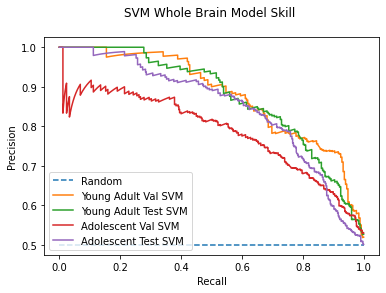

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

# YA VAL
vprecision, vrecall, _ = precision_recall_curve(y_v, y_vprob)
v_f1, v_auc = f1_score(y_v, y_vpred), auc(vrecall, vprecision)
# YA Test
tprecision, trecall, _ = precision_recall_curve(y_t, y_tprob)
t_f1, t_auc = f1_score(y_t, y_tpred), auc(trecall, tprecision)

# AD VAL
vprecisionad, vrecallad, _ = precision_recall_curve(y_vad, y_vprobad)
v_f1ad, v_aucad = f1_score(y_vad, y_vpredad), auc(vrecallad, vprecisionad)
# AD TEST
tprecisionad, trecallad, _ = precision_recall_curve(y_tad, y_tprobad)
t_f1ad, t_aucad = f1_score(y_tad, y_tpredad), auc(trecallad, tprecisionad)

# summarize scores
print(f'Young Adult SVM: f1={v_f1 * 100:{.5}}% auc={v_auc* 100:{.5}}% \n')
print(f'Young Adult SVM: f1={t_f1* 100:{.5}}% auc={t_auc* 100:{.5}}% \n')

print(f'Young Adult SVM: f1={v_f1ad* 100:{.5}}% auc={v_aucad* 100:{.5}}% \n')
print(f'Young Adult SVM: f1={t_f1ad* 100:{.5}}% auc={t_aucad* 100:{.5}}% \n')

# plot the precision-recall curves
random = len(y_v[y_v==1]) / len(y_v)
plt.plot([0, 1], [random, random], linestyle='--', label='Random')

#YA
plt.plot(vrecall, vprecision, marker='', label='Young Adult Val SVM')
plt.plot(trecall, tprecision, marker='', label='Young Adult Test SVM')

#AD
plt.plot(vrecallad, vprecisionad, marker='', label='Adolescent Val SVM')
plt.plot(trecallad, tprecisionad, marker='', label='Adolescent Test SVM')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("SVM Whole Brain Model Skill \n")

# show the legend
plt.legend(loc = "lower left")

# show the plot
plt.show()

## ROC Curve

In [ ]:
# calculate roc curve
from sklearn.metrics import roc_curve, roc_auc_score

#YA
fprv, tprv, thresholdsv = roc_curve(y_v, y_vprob)
fprt, tprt, thresholdst = roc_curve(y_t, y_tprob)

#AD
fprvad, tprvad, thresholdsvad = roc_curve(y_vad, y_vprobad)
fprtad, tprtad, thresholdstad = roc_curve(y_tad, y_tprobad)

Young Adult SVM WB Model Validation: ROC AUC=87.141% 

Young Adult SVM WB Model Test: ROC AUC=85.733% 

Adolescent SVM WB Model Validation: ROC AUC=79.959% 

Adolescent SVM WB Model Test: ROC AUC=82.688% 



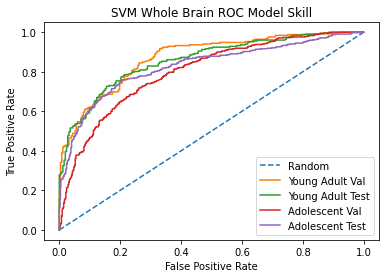

In [ ]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_v))]
ns_auc = roc_auc_score(y_v, ns_probs)

# calculate scores
#YA
val_auc = roc_auc_score(y_v, y_vprob)
test_auc = roc_auc_score(y_t, y_tprob)

#AD
val_aucad = roc_auc_score(y_vad, y_vprobad)
test_aucad = roc_auc_score(y_tad, y_tprobad)
# summarize scores

print(f'Young Adult SVM WB Model Validation: ROC AUC={val_auc*100:{.5}}% \n')
print(f'Young Adult SVM WB Model Test: ROC AUC={test_auc*100:{.5}}% \n')
print(f'Adolescent SVM WB Model Validation: ROC AUC={val_aucad*100:{.5}}% \n')
print(f'Adolescent SVM WB Model Test: ROC AUC={test_aucad*100:{.5}}% \n')

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_v, ns_probs)
fprv, tprv, thresholdsv = roc_curve(y_v, y_vprob)
fprt, tprt, thresholdst = roc_curve(y_t, y_tprob)

#ad
fprvad, tprvad, thresholdsvad = roc_curve(y_vad, y_vprobad)
fprtad, tprtad, thresholdstad = roc_curve(y_tad, y_tprobad)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random')
plt.plot(fprv, tprv, marker='', label='Young Adult Val')
plt.plot(fprt, tprt, marker='', label='Young Adult Test')
plt.plot(fprvad, tprvad, marker='', label='Adolescent Val')
plt.plot(fprtad, tprtad, marker='', label='Adolescent Test')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("SVM Whole Brain ROC Model Skill")

# show the legend
plt.legend()
# show the plot
plt.show()

## Ypred and Ytrue

In [ ]:
yaya_mask

defaultdict(list,
            {'test_acc': [0.7837301587301587],
             'test_preds': [array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
                     1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
                     0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
                     1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
                     1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
                     1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                     0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
                     1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
                     1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
                     0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
                     1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 